In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dataset = pd.read_csv("ds_salaries (ML).csv")
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [31]:
dataset.shape

(3755, 11)

In [33]:
dataset.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [35]:
dataset.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [174]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   work_year                  2584 non-null   int64  
 1   experience_level           2584 non-null   object 
 2   employment_type            2584 non-null   object 
 3   job_title                  2584 non-null   object 
 4   salary                     2584 non-null   int64  
 5   salary_currency            2584 non-null   object 
 6   salary_in_usd              2584 non-null   int64  
 7   employee_residence         2584 non-null   object 
 8   remote_ratio               2584 non-null   int64  
 9   company_location           2584 non-null   object 
 10  company_size               2584 non-null   object 
 11  experience_level_Encode    2584 non-null   int32  
 12  employment_type_Encode     2584 non-null   int32  
 13  job_title_Encode           2584 non-null   int32  
 1

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [41]:
dataset[dataset.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [43]:
dataset[dataset.duplicated()].shape

(1171, 11)

In [45]:
dataset=dataset.drop_duplicates(keep='first')
dataset.shape

(2584, 11)

In [47]:
dataset.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [49]:
dataset.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [51]:
corr=dataset[['work_year','salary']].corr()
corr

,work_year,salary
work_year,1.000000,-0.099153
salary,-0.099153,1.000000


<Axes: >

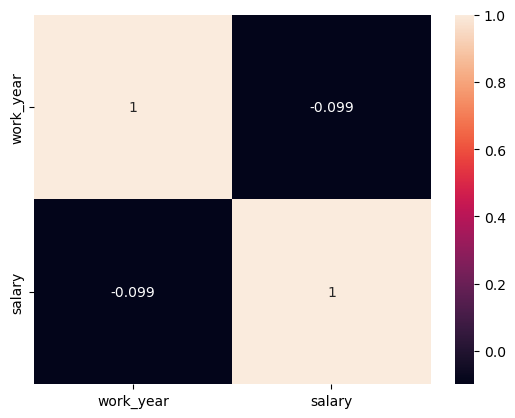

In [53]:
sns.heatmap(corr,annot=True)

In [55]:
dataset['job_title'].value_counts()


job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64

<Axes: xlabel='job_title'>

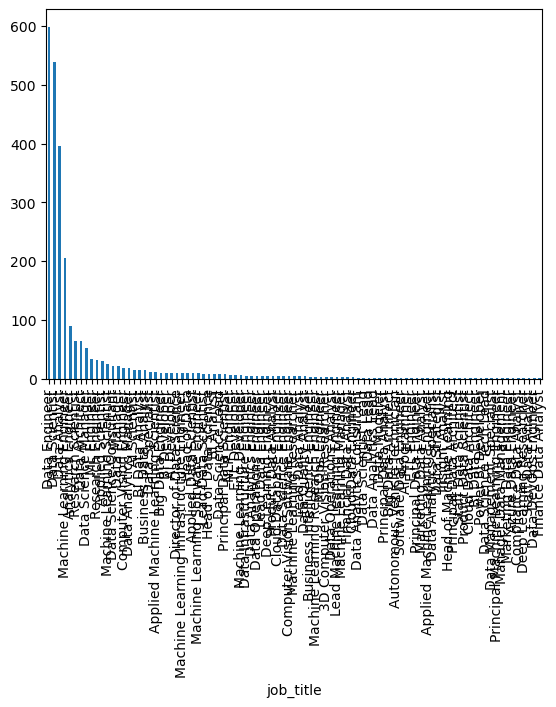

In [57]:
dataset['job_title'].value_counts().plot(kind='bar')

In [59]:
dataset['experience_level'].value_counts()

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

<Axes: xlabel='experience_level'>

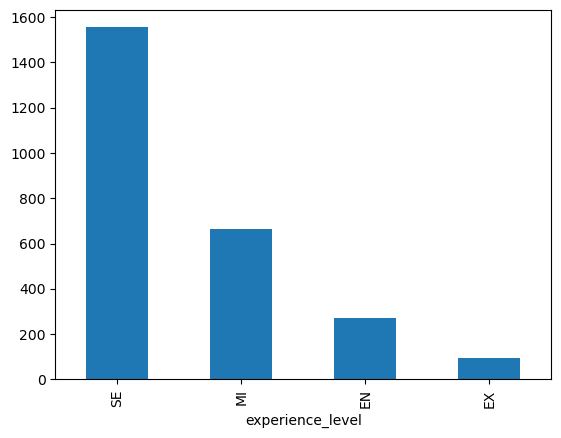

In [62]:
dataset['experience_level'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

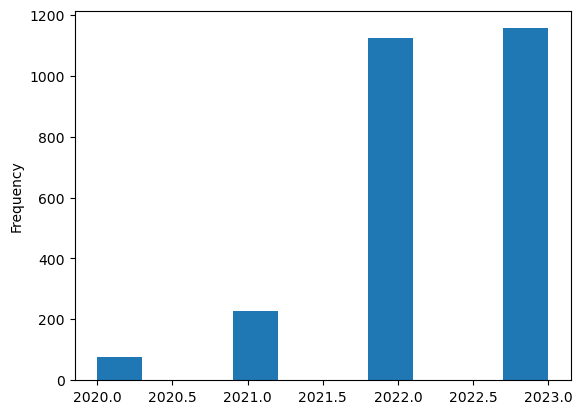

In [64]:
dataset.work_year.plot(kind='hist')

<Axes: >

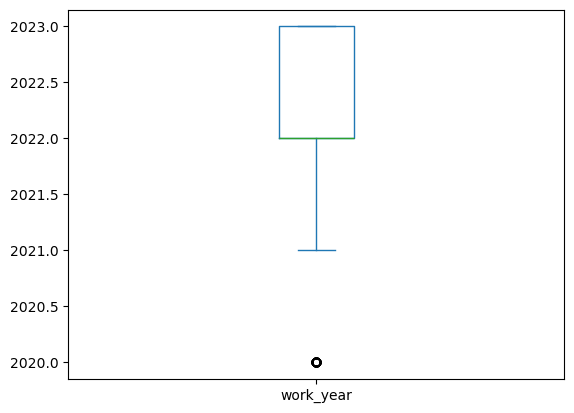

In [66]:
dataset.work_year.plot(kind='box')

<Axes: ylabel='Frequency'>

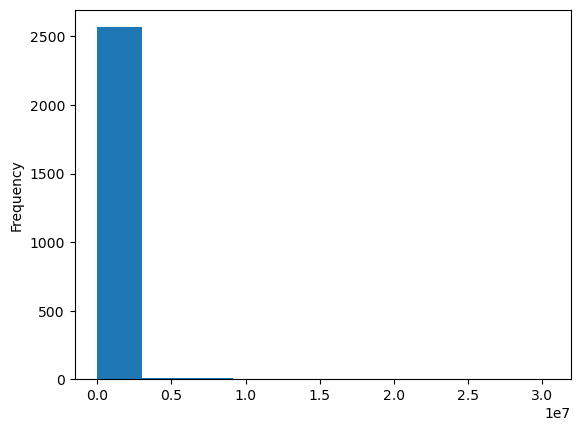

In [68]:
dataset.salary.plot(kind='hist')

In [70]:
dataset['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

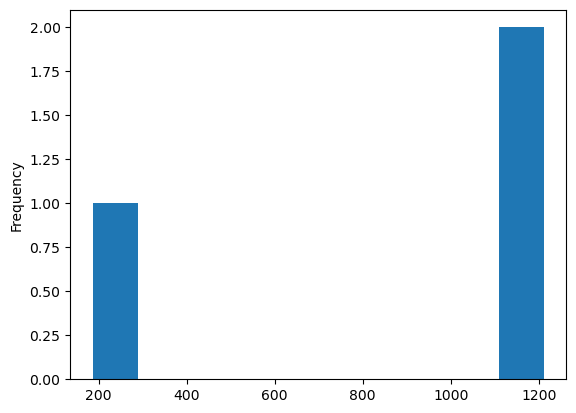

In [73]:
dataset['remote_ratio'].value_counts().plot(kind='hist')

<Axes: ylabel='Frequency'>

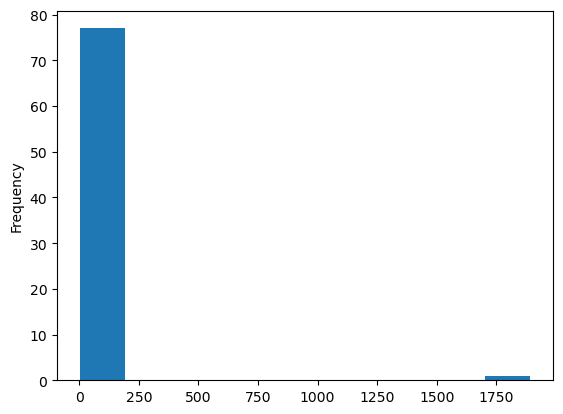

In [75]:
dataset['employee_residence'].value_counts().plot(kind='hist')

In [77]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

In [79]:
dataset['experience_level_Encode']=Label_Encoder.fit_transform(dataset['experience_level'])

In [81]:
dataset['employment_type_Encode']=Label_Encoder.fit_transform(dataset['employment_type'])

In [83]:
dataset['job_title_Encode']=Label_Encoder.fit_transform(dataset['job_title'])

In [85]:
dataset['employee_residence_Encode']=Label_Encoder.fit_transform(dataset['employee_residence'])

In [87]:
dataset['company_location_Encode']=Label_Encoder.fit_transform(dataset['company_location'])

In [89]:
dataset['company_size_Encode']=Label_Encoder.fit_transform(dataset['company_size'])

In [91]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_Encode,employment_type_Encode,job_title_Encode,employee_residence_Encode,company_location_Encode,company_size_Encode
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3,2,84,26,25,0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,2,0,66,75,70,2
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2,0,66,75,70,2
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,3,2,47,11,12,1
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,3,2,47,11,12,1


In [93]:
dataset['salary_currency_Encode']=Label_Encoder.fit_transform(dataset['salary_currency'])

In [95]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_Encode,employment_type_Encode,job_title_Encode,employee_residence_Encode,company_location_Encode,company_size_Encode,salary_currency_Encode
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3,2,84,26,25,0,7
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,2,0,66,75,70,2,19
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2,0,66,75,70,2,19
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,3,2,47,11,12,1,19
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,3,2,47,11,12,1,19


In [97]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [99]:
dataset['work_year_scaled']=std_scaler.fit_transform(dataset[['work_year']])
dataset['salary_scaled']=std_scaler.fit_transform(dataset[['salary']])

In [101]:
dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_Encode,employment_type_Encode,job_title_Encode,employee_residence_Encode,company_location_Encode,company_size_Encode,salary_currency_Encode,work_year_scaled,salary_scaled
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3,2,84,26,25,0,7,0.933091,-0.161367
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,2,0,66,75,70,2,19,0.933091,-0.223257
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,2,0,66,75,70,2,19,0.933091,-0.228827
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,3,2,47,11,12,1,19,0.933091,-0.043775
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,3,2,47,11,12,1,19,0.933091,-0.111855


In [103]:
x=dataset[['work_year_scaled','experience_level_Encode','employment_type_Encode','job_title_Encode','company_size_Encode']]
y=dataset[['salary']]

In [105]:
x.head()

,work_year_scaled,experience_level_Encode,employment_type_Encode,job_title_Encode,company_size_Encode
0,0.933091,3,2,84,0
1,0.933091,2,0,66,2
2,0.933091,2,0,66,2
3,0.933091,3,2,47,1
4,0.933091,3,2,47,1


In [107]:
y.head()

,salary
0,80000
1,30000
2,25500
3,175000
4,120000


In [109]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [113]:
x_train.head()

,work_year_scaled,experience_level_Encode,employment_type_Encode,job_title_Encode,company_size_Encode
25,0.933091,3,2,18,1
2647,-0.401963,2,2,37,1
2624,-0.401963,3,2,25,1
2565,-0.401963,3,2,25,1
2390,-0.401963,2,2,33,1


In [115]:
x_train.shape,y_train.shape

((2067, 5), (2067, 1))

In [117]:
x_test.shape,y_test.shape

((517, 5), (517, 1))

In [119]:
from sklearn.linear_model import LinearRegression

In [121]:
Linear_regeression_model=LinearRegression()

In [123]:
Linear_regeression_model.fit(x_train,y_train)

LinearRegression()

In [146]:
y_pred_lr=Linear_regeression_model.predict(x_test)
y_pred_lr.flatten()

array([236011.6510385 , 147317.54033981, 217503.4292389 , 127371.79125331,
       596422.62566972, 115844.58163399, 170695.39162188, 229030.63885822,
       126931.55142072, 519221.57748165, 217503.4292389 , 255400.35250326,
        94578.11304973, 229030.63885822, 115844.58163399, 111415.1919841 ,
       233460.0285081 , 115844.58163399, 120947.82669477, 115844.58163399,
       125377.21634466, 129806.60599454, 132184.52090135, -13912.02231562,
       219498.00414755, 305200.25248325, 462880.90515396, 448478.64096083,
       111415.1919841 , 129806.60599454, 129806.60599454, 211519.70451294,
       115844.58163399, 107866.28199938,  94578.11304973, 384769.05167316,
       468864.62987992, 101385.41760643, 129806.60599454, 198231.53556329,
       115844.58163399, 211519.70451294, 422989.40698095, 233460.0285081 ,
       120390.77907303, 105871.70709073, 115844.58163399, 217503.4292389 ,
       415127.91513551, -48195.56285899, 125817.45617724, 323151.42666111,
       129806.60599454,  

In [218]:
df= pd.DataFrame({'y_Actual':[y_test],'y_Predicted':[y_pred_lr]})
df['Error']=df['y_Actual']-df['y_Predicted']
df['abs_error']=abs(df['Error'])
df

,y_Actual,y_Predicted,Error,abs_error
0,salary 3181 50000 540 90000 2640 2...,"[[236011.65103849553], [147317.54033981432], [...",salary 3181 -186011.651038 540 ...,salary 3181 186011.651038 540 ...


In [194]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [196]:
r2_score(y_test,y_pred_lr)

-0.03128679109703647

In [198]:
print(f'Accuracy of model={round(r2_score(y_test,y_pred_lr),4)*100}%')

Accuracy of model=-3.1300000000000003%


In [200]:
round(mean_absolute_error(y_test,y_pred_lr),2)

176614.0

In [220]:
mse=round(mean_squared_error(y_test,y_pred_lr),2)
mse

323154192628.88

In [222]:
print('root mean squared error(rmse)=', mse**(0.5))

root mean squared error(rmse)= 568466.5272721692


In [224]:
Linear_regeression_model.coef_

array([[ -77639.9047614 ,    4429.38964988,     818.49787826,
            997.28745433, -200499.54047043]])

In [226]:
Linear_regeression_model.intercept_

array([340953.54921491])